<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#After-talking-to-Roy,-deciding-to-give-spatial-correlation-another-shot." data-toc-modified-id="After-talking-to-Roy,-deciding-to-give-spatial-correlation-another-shot.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>After talking to Roy, deciding to give spatial correlation another shot.</a></span></li></ul></div>

### After talking to Roy, deciding to give spatial correlation another shot.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

import scipy
from scipy.spatial import cKDTree

In [21]:
# Load cleaned version of data 
all_rds_df = pd.read_csv("C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/Zambia/rcd_enrichment_radius/all_rounds_data_cleaned.csv")
all_rds_df = all_rds_df.sort_values(by=["round","catch"]).reset_index(drop=True)

c:\users\jsuresh\venv\idm\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
rr = []
cc = []
pp = []

for i, sdf in all_rds_df.groupby(["round", "catch"]):
    if i[1] != "None":
        rr.append(i[0])
        cc.append(i[1])
        pp.append(np.sum(sdf["rdt_pos"])/len(sdf))
    
cdf = pd.DataFrame({
    "catch": cc,
    "round": rr,
    "catch_prev": pp 
})

cdf.to_csv("catch_background_prev.csv", index=False)

In [22]:
all_rds_df = all_rds_df.merge(cdf,on=["catch","round"], how="left")
all_rds_df = all_rds_df.dropna()

In [20]:
all_rds_df

,person_id,household_id,round,latitude,longitude,catch,rdt_pos,x,y,catch_prev_x,catch_prev_y
0,uuid:9b02be82-9dac-4a35-a80a-17c9c6b5ed00,uuid:007b9a41-4616-4b81-95f6-660282bd3109,1,-16.500518,27.958743,Bbondo,0.0,9650.103957,23514.006309,0.092425,0.092425
1,uuid:b49e4841-f741-4f33-a2bb-d704a4f83f8c,uuid:007b9a41-4616-4b81-95f6-660282bd3109,1,-16.500518,27.958743,Bbondo,0.0,9650.103957,23514.006309,0.092425,0.092425
2,uuid:e2d87552-8df6-44bb-a475-dddba9fc5751,uuid:007b9a41-4616-4b81-95f6-660282bd3109,1,-16.500518,27.958743,Bbondo,0.0,9650.103957,23514.006309,0.092425,0.092425
3,uuid:4622c8e3-391a-498f-8acd-6f3ff0486b5e,uuid:007b9a41-4616-4b81-95f6-660282bd3109,1,-16.500518,27.958743,Bbondo,0.0,9650.103957,23514.006309,0.092425,0.092425
4,uuid:a59a41ff-4e3f-4c5d-b4aa-b79d423eac79,uuid:007b9a41-4616-4b81-95f6-660282bd3109,1,-16.500518,27.958743,Bbondo,0.0,9650.103957,23514.006309,0.092425,0.092425
5,uuid:2ebabed0-c2ac-497b-9913-9abfd3f42560,uuid:007b9a41-4616-4b81-95f6-660282bd3109,1,-16.500518,27.958743,Bbondo,0.0,9650.103957,23514.006309,0.092425,0.092425
6,uuid:6a4a8f72-0571-4998-88cb-1442ac6d7bf3,uuid:007ec893-50e7-4c60-ba2e-35de80d48ba9,1,-16.469910,27.984363,Bbondo,0.0,12381.634874,26921.290624,0.092425,0.092425
7,uuid:f7be9406-4a5c-4636-bd27-7c14489c6f93,uuid:007ec893-50e7-4c60-ba2e-35de80d48ba9,1,-16.469910,27.984363,Bbondo,0.0,12381.634874,26921.290624,0.092425,0.092425
8,uuid:e54403c9-3a65-4c79-a039-8bedb1142268,uuid:007ec893-50e7-4c60-ba2e-35de80d48ba9,1,-16.469910,27.984363,Bbondo,0.0,12381.634874,26921.290624,0.092425,0.092425
9,uuid:fe56fa82-f26c-4f6c-b0de-6c06eba064b8,uuid:007ec893-50e7-4c60-ba2e-35de80d48ba9,1,-16.469910,27.984363,Bbondo,0.0,12381.634874,26921.290624,0.092425,0.092425


In [18]:
all_rds_df.describe()

,round,latitude,longitude,rdt_pos,x,y,catch_prev
count,1.031183e+06,1.031183e+06,1.031183e+06,1.031183e+06,1.031183e+06,1.031183e+06,1.011358e+06
mean,6.164134e+00,-1.683982e+01,2.769403e+01,9.106240e-02,5.233989e-11,-1.887242e-11,9.186658e-02
std,2.920011e+00,4.847288e-01,6.387804e-01,2.876980e-01,6.372891e+04,5.198847e+04,1.170616e-01
min,1.000000e+00,-1.805447e+01,2.600834e+01,0.000000e+00,-1.982961e+05,-1.537457e+05,0.000000e+00
25%,4.000000e+00,-1.716926e+01,2.721040e+01,0.000000e+00,-3.972348e+04,-3.673281e+04,1.315789e-02
50%,7.000000e+00,-1.681855e+01,2.760379e+01,0.000000e+00,-9.625547e+03,-6.768801e+03,3.421346e-02
75%,9.000000e+00,-1.650378e+01,2.804321e+01,0.000000e+00,3.469085e+04,3.764727e+04,1.557292e-01
max,1.000000e+01,-1.575292e+01,2.890884e+01,1.000000e+00,1.494216e+05,1.349966e+05,4.916089e-01


In [ ]:
# Groupby round/catch
# build kdtree for all people, and one for pos people
# count_neighbors for pos, for real data.
# reshuffle cases, and compute again.  do this N=100 or 1000 times
# make figure and save
# save intermediate file: enrich radii at different significance cutoffs [80,90,95,99]


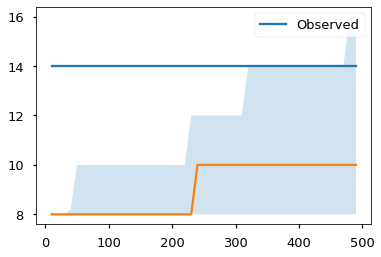

In [91]:
rbins = np.arange(10,500,10)
n_randomizations = 1000

# for i, sdf in all_rds_df.groupby(["catch", "round"]):
sdf = all_rds_df[np.logical_and(all_rds_df["round"]==9, all_rds_df["catch"]=="Bbondo")]

# Create kdtree
pos_cut = sdf["rdt_pos"]==1
pos_individuals_xy = np.array(sdf[["x", "y"]][pos_cut])
ckdt_pos = cKDTree(pos_individuals_xy)

c_data = ckdt_pos.count_neighbors(ckdt_pos, rbins)


randomization_data = randomized_correlation(sdf, rbins, n_randomizations=n_randomizations)
plt.plot(rbins, c_data, label="Observed")
plt.plot(rbins, percentile_across_axis(randomization_data,50))
plt.fill_between(rbins, percentile_across_axis(randomization_data,10),percentile_across_axis(randomization_data,90),alpha=0.2)
plt.legend()

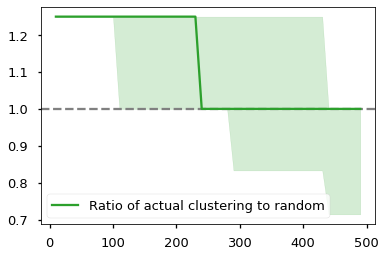

In [93]:

m = percentile_across_axis(randomization_data,50)
q1 = percentile_across_axis(randomization_data,20)
q3 = percentile_across_axis(randomization_data,80)
# Plotting pairs
# plt.plot(rbins, c_data/np.max(c_data), label="Observed", color="C2")
# plt.plot(rbins, m/np.max(m),color="C1",label="Randomizations")
# plt.fill_between(rbins, q1/np.max(m),q3/np.max(m),alpha=0.2, color="C1")

# Plotting pair enrichment
plt.axhline(1,linestyle='dashed', color='gray')
plt.plot(rbins, c_data/np.max(c_data)/(m/np.max(m)), label="Ratio of actual clustering to random", color="C2")
plt.fill_between(rbins, c_data/np.max(c_data)/(q3/np.max(m)),c_data/np.max(c_data)/(q1/np.max(m)), color="C2", alpha=0.2)
plt.legend()

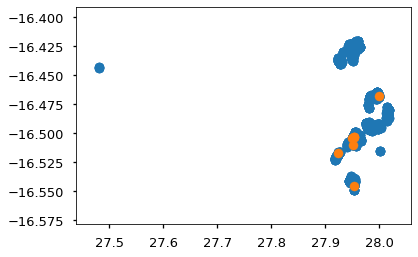

In [95]:
plt.scatter(sdf["longitude"],sdf["latitude"])
plt.scatter(sdf["longitude"][sdf["rdt_pos"]==1],sdf["latitude"][sdf["rdt_pos"]==1])

In [36]:
np.arange(len(sdf))[subsample]

array([1874, 1913, 1489,  826,  512, 1967, 1024, 1960])

array([[17., 13., 13., 13., 13.],
       [17., 19., 13., 13., 13.],
       [17., 19., 13., 13., 13.],
       [17., 19., 13., 17., 15.],
       [17., 19., 15., 17., 15.],
       [17., 19., 15., 17., 15.],
       [17., 19., 15., 17., 15.],
       [17., 19., 15., 17., 15.],
       [17., 19., 15., 17., 15.],
       [17., 19., 15., 19., 15.]])

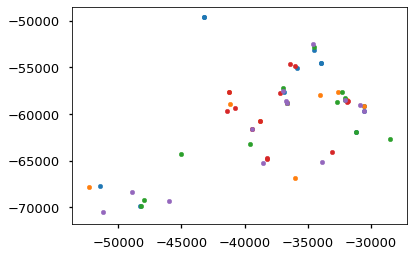

In [216]:
randomized_correlation(sdf,rbins,n_randomizations=5, make_plot=True)

In [306]:
def randomized_correlation(sdf, rbins, n_randomizations=1000, make_plot=False):
    n_pos = np.sum(sdf["rdt_pos"])
    n_all = len(sdf)
    n_rbins = len(rbins)
    
    all_data = np.zeros([n_randomizations, n_rbins])
    ii = np.arange(n_all)
    
    if make_plot: 
        plt.figure()
    
    for j in np.arange(n_randomizations):
        subsample = np.random.choice(ii,n_pos.astype("int"), replace=False)
        randomized_pos_xy = np.array(sdf[["x", "y"]])[subsample]
        
        ckdt_pos = cKDTree(randomized_pos_xy)
#         foo = ckdt_pos.count_neighbors(ckdt_pos, rbins)
#         print(foo)
        all_data[j,:] = ckdt_pos.count_neighbors(ckdt_pos, rbins)
        
        if make_plot:
            plt.scatter(randomized_pos_xy[:,0],randomized_pos_xy[:,1], marker='.')
    
    return all_data

def percentile_across_axis(m, p):
    # m is matrix
    n_rbins = m.shape[1]
    return_array = np.zeros(n_rbins)
    for i in np.arange(n_rbins):
        return_array[i] = np.percentile(m[:,i],p)
        
    return return_array 

In [292]:
rbins

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])

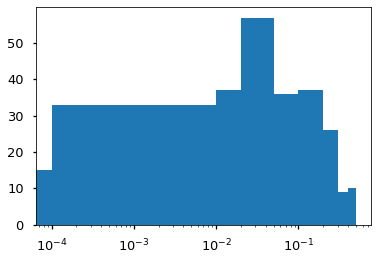

In [104]:
plt.hist(cdf["catch_prev"], bins=[0,0.0001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5], histtype="bar")
plt.xscale("log")

# Try binning

The nice thing is that binning just means summing up

In [106]:
sdf["catch_prev"].iloc[0]

0.003639672429481347

In [331]:
sdf

,person_id,household_id,round,latitude,longitude,catch,rdt_pos,x,y,catch_prev
816325,uuid:261c0823-8b03-478b-a590-eaee5a27e020,46229,9,-16.979981,26.861415,Mochipapa,0.0,-63537.212872,-1597.855179,0.028571
816326,uuid:2d056d91-b1ae-4922-8486-e1ae168dee79,38510,9,-16.786415,27.079446,Mochipapa,0.0,-40322.528474,19949.677244,0.028571
816327,uuid:302647a5-d304-424a-a43d-057857016114,38510,9,-16.786415,27.079446,Mochipapa,0.0,-40322.528474,19949.677244,0.028571
816329,uuid:3d6ef7b8-ae26-4789-993a-b9f381964450,58181,9,-16.774759,27.136090,Mochipapa,0.0,-34291.452340,21247.294304,0.028571
816330,uuid:3db6ec85-8373-41f2-ae95-bfaeb05db143,25758,9,-16.789541,27.085018,Mochipapa,0.0,-39729.322114,19601.784703,0.028571
816332,uuid:51d03cba-ccfd-4612-be6b-abbb40000f62,8379,9,-16.789663,27.085000,Mochipapa,0.0,-39731.170507,19588.095824,0.028571
816333,uuid:56cf4071-fa1d-4720-9039-4a06800db40e,58181,9,-16.774759,27.136090,Mochipapa,0.0,-34291.452340,21247.294304,0.028571
816334,uuid:59c5f62e-d4af-4fcd-a2fb-55b43c41788a,38510,9,-16.786415,27.079446,Mochipapa,0.0,-40322.528474,19949.677244,0.028571
816336,uuid:5c7f52de-dc4e-45d9-a2fa-0edd859b8731,38510,9,-16.786415,27.079446,Mochipapa,0.0,-40322.528474,19949.677244,0.028571
816337,uuid:5eca51bf-64af-453e-a72f-d7b49f4edaac,46229,9,-16.979981,26.861415,Mochipapa,0.0,-63537.212872,-1597.855179,0.028571


In [333]:
len(sdf)

25

In [647]:
sanity_check=False
save_individual=False
if sanity_check:
    plt.figure(figsize=(10,10))

    
    
rbins = np.arange(5,300,10)
n_randomizations = 1000

sum_c_data = np.zeros_like(rbins)
sum_randomization_data = np.zeros([n_randomizations, len(rbins)])
sum_c_underlying = np.zeros_like(rbins)

for ii, sdf in all_rds_df.groupby(["catch", "round"]):
# sdf = all_rds_df[np.logical_and(all_rds_df["round"]==9, all_rds_df["catch"]=="Bbondo")]
    catch_prev = sdf["catch_prev"].iloc[0]
    pos_cut = sdf["rdt_pos"]==1
    
#     if np.logical_and(catch_prev > 0.06, catch_prev <= 0.08) and np.sum(pos_cut) > 1 and len(sdf) > 50:
    if np.logical_and(catch_prev > 0.1, catch_prev <= 0.2) and np.sum(pos_cut) > 1 and len(sdf) > 50:
#     if len(sdf) > 50 and np.sum(pos_cut) > 1:
        print(ii)
        # Create kdtree
        pos_individuals_xy = np.array(sdf[["x", "y"]][pos_cut])
        ckdt_pos = cKDTree(pos_individuals_xy)

        c_data = ckdt_pos.count_neighbors(ckdt_pos, rbins)
        
        randomization_data = randomized_correlation(sdf, rbins, n_randomizations=n_randomizations)
        
        # testing
#         ckdt_all = cKDTree(np.array(sdf[["x","y"]]))
#         c_underlying = ckdt_all.count_neighbors(ckdt_all, rbins)
#         sum_c_underlying += c_underlying
        
        sum_c_data += c_data
        sum_randomization_data += randomization_data

        
#         print(randomization_data)
        if save_individual:
            c_data_diff = np.diff(c_data, prepend=0)
            m = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),50)
            q1 = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),10)
            q3 = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),90)
            
            xx = np.arange(20)
            yy = []
            yy_low = []
            yy_high = []

            ff = 1
            for i in range(20):
                num_real = np.sum(c_data_diff[i*ff:(i+1)*ff])
                num_exp_m = np.sum(m[i*ff:(i+1)*ff])
                num_exp_q1 = np.sum(q1[i*ff:(i+1)*ff])
                num_exp_q3 = np.sum(q3[i*ff:(i+1)*ff])
                
                print(num_real)
                print(num_exp_m)

                yy.append(num_real/num_exp_m)
                yy_low.append(num_real/num_exp_q3)
                yy_high.append(num_real/num_exp_q1)
    
            plt.close('all')
            plt.figure()
            ff=2
            plt.scatter(xx*5*ff,yy, label="Ratio to mean", color="C2")
            plt.scatter(xx*5*ff,yy_low, label="Ratio to upper bound")
            # plt.fill_between(xx*50, yy_low,yy_high, color="C2", alpha=0.2)
            plt.axhline(1)
            plt.legend()
            plt.savefig("catch_round_correlations/{}_rd{}.png".format(ii[0],ii[1]))

        if sanity_check:
            all_individuals_xy = np.array(sdf[["x", "y"]])
            ckdt_all = cKDTree(all_individuals_xy)
            c_data_pop = ckdt_all.count_neighbors(ckdt_all, rbins)
            plt.plot(rbins, np.diff(c_data_pop,prepend=0))

        

('Chabbobboma', 2)
('Chabbobboma', 3)
('Chabbobboma', 6)
('Chasanga', 2)
('Chasanga', 3)
('Chasanga', 6)
('Cheeba', 7)
('Cheeba', 10)
('Chipepo', 2)
('Chipepo', 3)
('Chipepo', 6)
('Chisanga', 7)
('Chisanga', 8)
('Chiyabi', 8)
('Luumbo', 6)
('Masuku', 7)
('Munyama', 7)
('Munyama', 8)
('Munyumbwe', 2)
('Munyumbwe', 4)
('Nabutezi', 7)
('Nyanga Chaamwe', 1)
('Siansowa', 7)
('Sianyoolo', 7)
('Siatwinda', 9)
('Sikaneka', 9)
('Sinafala', 2)
('Sinafala', 3)
('Sinafala', 5)
('Sinafala', 7)
('Sinafala', 9)
('Sinamalima', 3)
('Sinamalima', 5)
('Sinamalima', 6)
('Sinamalima', 9)
('Sinazongwe', 9)


In [648]:
randomization_data = sum_randomization_data
c_data = sum_c_data
c_underlying = sum_c_underlying

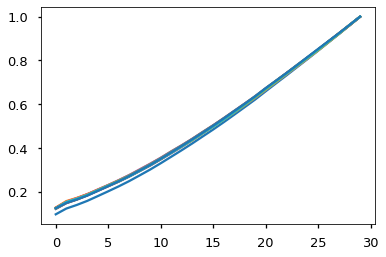

In [612]:
plt.plot(c_underlying/np.max(c_underlying))
for jj in range(10):
    plt.plot(randomization_data[jj,:]/np.max(randomization_data[jj,:]))

In [587]:
np.diff(sum_randomization_data, axis=1,prepend=0)

array([[2339.,  236.,  132., ...,  102.,   94.,   92.],
       [2327.,  170.,  114., ...,   66.,   82.,   86.],
       [2323.,  170.,  134., ...,  122.,  128.,  124.],
       ...,
       [2427.,  246.,  144., ...,  108.,   92.,  116.],
       [2325.,  318.,  134., ...,   86.,   88.,  134.],
       [2335.,  236.,   94., ...,   84.,   94.,  104.]])

In [308]:


m = np.diff(percentile_across_axis(randomization_data,50),prepend=0)
q1 = np.diff(percentile_across_axis(randomization_data,10),prepend=0)
q3 = np.diff(percentile_across_axis(randomization_data,90),prepend=0)

# plt.plot(rbins, np.diff(c_data,prepend=0), label="Observed", color="C2")
# plt.plot(rbins, np.diff(m,prepend=0),color="C1",label="Randomizations")
# plt.fill_between(rbins, np.diff(q1,prepend=0),np.diff(q3,prepend=0),alpha=0.2, color="C1")

# Plotting pairs (raw)
# plt.plot(rbins, c_data, label="Observed", color="C2")
# plt.plot(rbins, m,color="C1",label="Randomizations")
# plt.fill_between(rbins, q1,q3,alpha=0.2, color="C1")

# plt.xlim([0,100])
# # Plotting pairs (normalized?)
# plt.plot(rbins, c_data/np.max(c_data), label="Observed", color="C2")
# plt.plot(rbins, m/np.max(m),color="C1",label="Randomizations")
# plt.fill_between(rbins, q1/np.max(m),q3/np.max(m),alpha=0.2, color="C1")

# Plotting pair enrichment (raw)
# plt.axhline(1,linestyle='dashed', color='gray')
# plt.plot(rbins, c_data/m, label="Observed", color="C2")
# plt.fill_between(rbins, c_data/q3,c_data/q1, color="C2", alpha=0.2)

# Plotting pair enrichment (normalized?)
# plt.axhline(1,linestyle='dashed', color='gray')
# plt.plot(rbins, c_data/np.max(c_data)/(m/np.max(m)), label="Ratio of actual clustering to random", color="C2")
# plt.fill_between(rbins, c_data/np.max(c_data)/(q3/np.max(m)),c_data/np.max(c_data)/(q1/np.max(m)), color="C2", alpha=0.2)
# plt.legend()
# plt.savefig("twopt_binned_0_0.005.png")

In [649]:
c_data = np.diff(sum_c_data, prepend=0)
# m = np.diff(percentile_across_axis(randomization_data,50),prepend=0)
# q1 = np.diff(percentile_across_axis(randomization_data,10),prepend=0)
# q3 = np.diff(percentile_across_axis(randomization_data,90),prepend=0)

m = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),50)
q1 = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),10)
q3 = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),90)

In [533]:
m = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),50)
m2 = np.average(np.diff(randomization_data,axis=1,prepend=0), axis=0)
s = 1.96*np.std(np.diff(randomization_data,axis=1,prepend=0), axis=0)

q1 = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),10)
q3 = percentile_across_axis(np.diff(randomization_data,axis=1,prepend=0),90)

In [466]:
s/m2

array([0.01549736, 0.06683381, 0.06837498, 0.06871574, 0.0685841 ,
       0.06402222, 0.06133657, 0.05742115, 0.05055442, 0.04172633,
       0.0389429 , 0.03791048, 0.03900187, 0.03660508, 0.03363258,
       0.0329432 , 0.03246783, 0.03280631, 0.0320608 , 0.03271001,
       0.03120721, 0.03342116, 0.03105022, 0.03022624, 0.0291954 ,
       0.03014863, 0.0301975 , 0.02991801, 0.0302149 , 0.03050767,
       0.02897991, 0.02983671, 0.03111743, 0.02824439, 0.03185099,
       0.03056468, 0.02981115, 0.02972219, 0.02813306, 0.03083106,
       0.02903496, 0.02914167, 0.03009847, 0.02980756, 0.03031355,
       0.02920105, 0.0288269 , 0.02872813, 0.02715408, 0.02898342,
       0.03193752, 0.02777594, 0.02957429, 0.02747093, 0.02929469,
       0.02979691, 0.03271183, 0.02932154, 0.03004377])

In [545]:
ma

array([262.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.])

(array([385., 344., 187.,  60.,   0.,  12.,   8.,   3.,   0.,   1.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

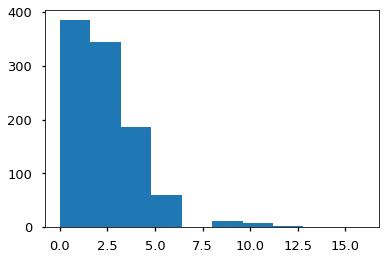

In [552]:
plt.scatter()

In [483]:
len(rbins)

100

(0, 500)

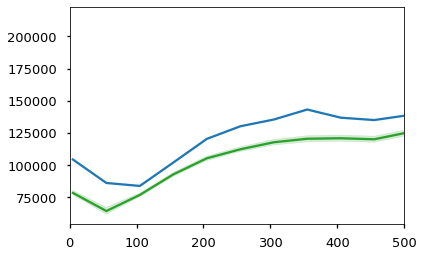

In [498]:
plt.plot(rbins,c_data)
plt.plot(rbins,m,color="C2")
# plt.plot(rbins,c_data/m)
plt.fill_between(rbins,q1, q3, alpha=0.2,color="C2")
plt.xlim([0,500])

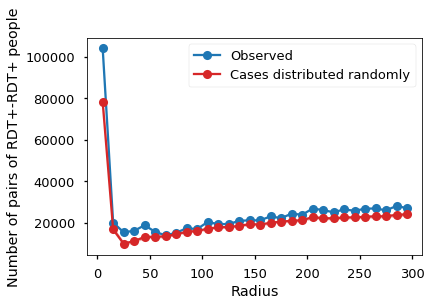

In [603]:
# Plot mean and 1.96 stdev (95%) rather than median/percentiles which will be discrete and often zero.

plt.plot(rbins,c_data+1,label="Observed", marker='o')

# Randomized
# yy_obs = 
plt.plot(rbins,m+1, color="C3", label="Cases distributed randomly", marker='o')
plt.fill_between(rbins,q1+1,q3+1, color="C3", alpha=0.3)
# plt.xscale("log")
# plt.yscale("log")
# xx = np.arange(300)
# yy = []
# yy_low = []
# yy_high = []
# ss = []

# ff = 1
# for i in range(len(rbins)):
#     num_real = np.sum(c_data[i*ff:(i+1)*ff])
#     num_exp_m = np.sum(m2[i*ff:(i+1)*ff])
#     num_exp_q1 = np.sum(m2[i*ff:(i+1)*ff]-s[i*ff:(i+1)*ff])
#     num_exp_q3 = np.sum(m2[i*ff:(i+1)*ff]+s[i*ff:(i+1)*ff])
    
#     yy.append(num_real)
#     yy_obs_m.append(num_exp_m)
#     yy_obs_low.append(num_exp_q3)
#     yy_obs_high.append(num_exp_q1)
#     ss.append(num_exp_m)
    

# ss = np.array(ss)/np.max(ss)*100
    
# xp = xx*50*ff
# plt.scatter(rbins,yy, label="Ratio to mean", color="C2", s=ss)
# plt.scatter(rbins,yy_low, label="Ratio to upper bound", s=ss)
# plt.scatter(rbins,yy_high, label="Ratio to upper bound", s=ss)
# # plt.fill_between(xx*50, yy_low,yy_high, color="C2", alpha=0.2)
# plt.axhline(1)
plt.ylabel("Number of pairs of RDT+-RDT+ people")
plt.xlabel("Radius")
plt.legend()

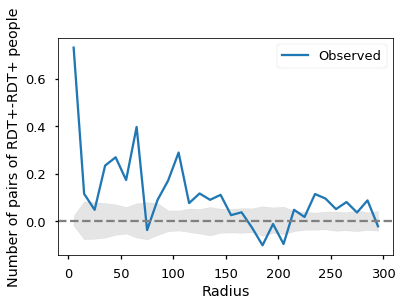

In [660]:
# Plot mean and 1.96 stdev (95%) rather than median/percentiles which will be discrete and often zero.
y = c_data-m
y2 = (c_data-m)/m
y3 = np.cumsum(y2)
# y1 = 
# y2 = c_data-q3
plt.plot(rbins,y2,label="Observed")
# plt.fill_between(rbins, (c_data-q1)/m, (c_data-np.sqrt(c_data)-q3)/m, alpha=0.2)
plt.axhline(0, linestyle='dashed', color='gray')
plt.fill_between(rbins, (q1-m)/m, (q3-m)/m, alpha=0.2, color='gray')
# plt.plot(rbins,np.cumsum(c_data-m),label="Observed", marker='o')

# Randomized
# yy_obs = 
# plt.plot(rbins,m+1, color="C3", label="Cases distributed randomly", marker='o')
# plt.fill_between(rbins,q1+1,q3+1, color="C3", alpha=0.3)
plt.ylabel("Number of pairs of RDT+-RDT+ people")
plt.xlabel("Radius")
plt.legend()

In [653]:
np.sqrt(c_data)/c_data

array([0.00315865, 0.00677099, 0.00844491, 0.00807503, 0.00800641,
       0.00878614, 0.0072105 , 0.00836125, 0.00827776, 0.00906249,
       0.00861365, 0.00875645, 0.00774194, 0.00750544, 0.0077545 ,
       0.0080265 , 0.00802753, 0.00816987, 0.00756448, 0.00743335,
       0.00776478, 0.00791014, 0.00820555, 0.00762759, 0.0076011 ,
       0.00777745, 0.00753864, 0.00764719, 0.00754293, 0.00779681])

In [541]:
foo = np.diff(randomization_data, prepend=0)
print(foo)
print(np.std(foo, axis=0))

[[260.   0.   2. ...   8.   2.   2.]
 [266.   0.   2. ...   2.   0.   0.]
 [262.   0.   2. ...   2.   8.   4.]
 ...
 [266.   0.   2. ...   4.   0.   0.]
 [264.   2.   4. ...   4.   2.   4.]
 [260.   2.   2. ...   8.   0.   4.]]
[3.4996937  2.19815832 1.54814857 1.58694675 1.84659579 2.16504596
 2.15241632 2.21085956 2.06046111 2.15995463 2.33443783 2.39135025
 2.44229318 2.40484844 2.31588514]


c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


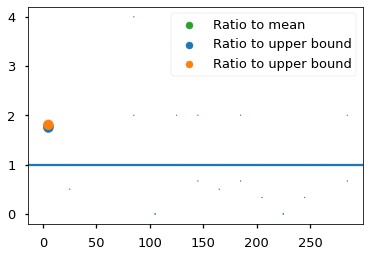

In [528]:
# Plotting pair enrichment (raw)
xx = np.arange(300)
yy = []
yy_low = []
yy_high = []
ss = []

ff = 1
for i in range(len(rbins)):
    num_real = np.sum(c_data[i*ff:(i+1)*ff])
    num_exp_m = np.sum(m[i*ff:(i+1)*ff])
    num_exp_q1 = np.sum(q1[i*ff:(i+1)*ff])
    num_exp_q3 = np.sum(q3[i*ff:(i+1)*ff])
    
    yy.append(num_real/num_exp_m)
    yy_low.append(num_real/num_exp_q3)
    yy_high.append(num_real/num_exp_q1)
    ss.append(num_exp_m)
    
ss = np.array(ss)/np.max(ss)*100
    
xp = xx*50*ff
plt.scatter(rbins,yy, label="Ratio to mean", color="C2", s=ss)
plt.scatter(rbins,yy_low, label="Ratio to upper bound", s=ss)
plt.scatter(rbins,yy_high, label="Ratio to upper bound", s=ss)
# plt.fill_between(xx*50, yy_low,yy_high, color="C2", alpha=0.2)
plt.axhline(1)
plt.legend()

In [531]:
m2

array([262.012,   1.79 ,   1.106,   1.24 ,   1.578,   2.024,   2.152,
         2.11 ,   2.15 ,   2.314,   2.48 ,   2.462,   2.698,   2.552,
         2.474])

In [242]:
# ll = np.diff(c_data, prepend=0)/np.diff(q3, prepend=0)
# mm = np.diff(c_data, prepend=0)/np.diff(m, prepend=0)
# uu = np.diff(c_data, prepend=0)/np.diff(q1, prepend=0)
print("Household enrichment ", c_data[0]/q3[0], c_data[0]/m[0], c_data[0]/q1[0])
# print("Household enrichment ", np.sum(ll[:5]), np.sum(mm[:5]), np.sum(uu[:5]))
print("10-50m enrichment ", np.sum(c_data[:5])-ll[0], np.sum(mm[:5])-mm[0], np.sum(uu[:5])-uu[0])
print("50-100m enrichment ", np.sum(ll[:10])-np.sum(ll[:5]), np.sum(mm[:10])-np.sum(mm[:5]), np.sum(uu[:10])-np.sum(uu[:5]))
print("100-150m enrichment ", np.sum(ll[:15])-np.sum(ll[:0]), np.sum(mm[:15])-np.sum(mm[:0]), np.sum(uu[:15])-np.sum(uu[:0]))
print("100-150m enrichment ", np.sum(ll[:15])-np.sum(ll[:0]), np.sum(mm[:15])-np.sum(mm[:0]), np.sum(uu[:15])-np.sum(uu[:0]))


Household enrichment  1.7306273062730628 1.769811320754717 1.7969348659003832
10-50m enrichment  nan nan nan
50-100m enrichment  nan nan nan
100-150m enrichment  nan nan nan
100-150m enrichment  nan nan nan


In [267]:
np.sum(c_data[30:35]-c_data[30])

4

In [268]:
np.sum(q1[30:35]-q1[30])

12.0

In [264]:
18/4

4.5

In [195]:
np.diff(m, prepend=0)

array([265.,   4.,   4.,   4.,   8.,   6.,   6.,   8.,   7.,   7.])

In [256]:
c_data.shape

(49,)

In [258]:
c_data[:50001]

array([469, 471, 471, 471, 479, 483, 483, 485, 491, 491, 491, 491, 497,
       499, 499, 499, 501, 501, 505, 505, 507, 507, 507, 509, 509, 513,
       515, 517, 521, 521, 521, 521, 521, 523, 523, 523, 525, 533, 533,
       533, 533, 533, 541, 543, 549, 551, 553, 553, 557])

# Save individual figures, comparing to underyling 2pt

('Batoka', 7)


c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  from ipykernel import kernelapp as app
c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


('Batoka', 8)
('Batoka', 9)
('Batoka', 10)
('Bbondo', 1)
('Bbondo', 2)
('Bbondo', 3)
('Bbondo', 4)
('Bbondo', 5)
('Bbondo', 6)
('Bbondo', 7)
('Bbondo', 8)
('Bbondo', 9)
('Bbondo', 10)
('Buleyamalima', 7)
('Buleyamalima', 8)
('Buleyamalima', 9)
('Buleyamalima', 10)
('Chaanga', 9)
('Chabbobboma', 1)
('Chabbobboma', 2)
('Chabbobboma', 3)
('Chabbobboma', 4)
('Chabbobboma', 5)
('Chabbobboma', 6)
('Chasanga', 1)
('Chasanga', 2)
('Chasanga', 3)
('Chasanga', 6)
('Cheeba', 7)
('Cheeba', 8)
('Cheeba', 9)
('Cheeba', 10)
('Chipepo', 1)
('Chipepo', 2)
('Chipepo', 3)
('Chipepo', 4)
('Chipepo', 5)
('Chipepo', 6)
('Chipepo Siavonga', 1)
('Chipepo Siavonga', 2)
('Chipepo Siavonga', 3)
('Chipepo Siavonga', 4)
('Chipepo Siavonga', 5)
('Chipepo Siavonga', 6)
('Chisanga', 7)
('Chisanga', 8)
('Chisanga', 9)
('Chiyabi', 1)
('Chiyabi', 2)
('Chiyabi', 3)
('Chiyabi', 4)
('Chiyabi', 5)
('Chiyabi', 6)
('Chiyabi', 7)
('Chiyabi', 8)
('Chiyabi', 9)
('Chiyabi', 10)
('Dimbwe', 7)
('Dimbwe', 8)
('Dimbwe', 9)
('Dimbwe',

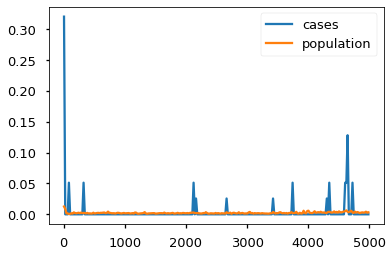

In [676]:
rbins = np.arange(5,5000,20)

for ii, sdf in all_rds_df.groupby(["catch", "round"]):
    catch_prev = sdf["catch_prev"].iloc[0]
    pos_cut = sdf["rdt_pos"]==1
    
    if len(sdf) > 50 and np.sum(pos_cut) > 1:
        print(ii)
        # Create kdtree
        pos_individuals_xy = np.array(sdf[["x", "y"]][pos_cut])
        
        ckdt_pos = cKDTree(pos_individuals_xy)
        c_data = ckdt_pos.count_neighbors(ckdt_pos, rbins)
        n_pos = np.sum(pos_cut)
        n_pos_pairs = scipy.misc.comb(n_pos,2)
        c_data_norm = np.diff(c_data/n_pos_pairs, prepend=0)
        
        ckdt_all = cKDTree(np.array(sdf[["x","y"]]))
        c_pop = ckdt_all.count_neighbors(ckdt_all, rbins)
        n_pop = len(sdf)
        n_pop_pairs = scipy.misc.comb(n_pop,2)
        c_pop_norm = np.diff(c_pop/n_pop_pairs, prepend=0)
       
        plt.close('all')
        plt.figure()
        plt.plot(rbins,c_data_norm, label="cases")
        plt.plot(rbins, c_pop_norm, label="population")
#         plt.axhline(1)
        plt.legend()
        plt.savefig("vs_pop/{}_rd{}.png".format(ii[0],ii[1]))


prev bin  0


c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


prev bin  1
prev bin  2
prev bin  3
prev bin  4
prev bin  5
prev bin  6
prev bin  7
prev bin  8
prev bin  9
prev bin  10
prev bin  11


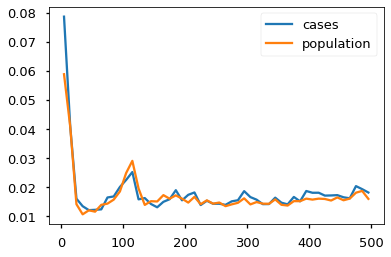

In [689]:
# Add things, giving each catchment EQUAL weight.

rbins = np.arange(5,500,10)

prev_bins = np.array([0,0.005,0.01,0.02,0.04,0.06,0.08,0.1,0.15,0.2,0.3,0.4,0.5])



for pp in range(len(prev_bins)-1):
    print("prev bin ",pp)
    catch_weighted_data = np.zeros_like(rbins).astype("float")
    catch_weighted_underlying = np.zeros_like(rbins).astype("float")
    num_catch_in_prevbin = 0
    
    for ii, sdf in all_rds_df.groupby(["catch", "round"]):
        catch_prev = sdf["catch_prev"].iloc[0]
        pos_cut = sdf["rdt_pos"]==1
        
        if np.logical_and(catch_prev > prev_bins[pp], catch_prev <= prev_bins[pp+1]) and np.sum(pos_cut) > 1 and len(sdf) > 50:
            num_catch_in_prevbin += 1
#             print(ii)
            # Create kdtree
            pos_individuals_xy = np.array(sdf[["x", "y"]][pos_cut])

            ckdt_pos = cKDTree(pos_individuals_xy)
            c_data = ckdt_pos.count_neighbors(ckdt_pos, rbins)
            n_pos = np.sum(pos_cut)
            n_pos_pairs = scipy.misc.comb(n_pos,2)
            c_data_norm = np.diff(c_data/n_pos_pairs, prepend=0)

            ckdt_all = cKDTree(np.array(sdf[["x","y"]]))
            c_pop = ckdt_all.count_neighbors(ckdt_all, rbins)
            n_pop = len(sdf)
            n_pop_pairs = scipy.misc.comb(n_pop,2)
            c_pop_norm = np.diff(c_pop/n_pop_pairs, prepend=0)

            catch_weighted_data += c_data_norm
            catch_weighted_underlying += c_pop_norm
            
            
    plt.close('all')
    plt.figure()
    plt.plot(rbins,catch_weighted_data, label="cases")
    plt.plot(rbins, catch_weighted_underlying, label="population")
#         plt.axhline(1)
    plt.legend()
    plt.savefig("vs_pop/prev_{}_{}.png".format(prev_bins[pp],prev_bins[pp+1]))


prev bin  0


c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


prev bin  1
prev bin  2
prev bin  3
prev bin  4
prev bin  5
prev bin  6
prev bin  7
prev bin  8
prev bin  9
prev bin  10
prev bin  11


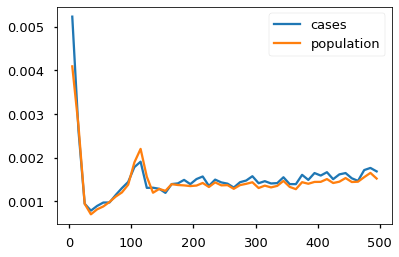

In [693]:
# Add things, giving each catchment POPULATION-weight.

rbins = np.arange(5,500,10)

prev_bins = np.array([0,0.005,0.01,0.02,0.04,0.06,0.08,0.1,0.15,0.2,0.3,0.4,0.5])



for pp in range(len(prev_bins)-1):
    print("prev bin ",pp)
    pop_weighted_data = np.zeros_like(rbins).astype("float")
    pop_weighted_underlying = np.zeros_like(rbins).astype("float")
    num_pop_in_prevbin = 0
    
    for ii, sdf in all_rds_df.groupby(["catch", "round"]):
        catch_prev = sdf["catch_prev"].iloc[0]
        pos_cut = sdf["rdt_pos"]==1
        
        if np.logical_and(catch_prev > prev_bins[pp], catch_prev <= prev_bins[pp+1]) and np.sum(pos_cut) > 1 and len(sdf) > 50:
            num_pos = np.sum(pos_cut)
            num_pop_in_prevbin += num_pos
            pos_individuals_xy = np.array(sdf[["x", "y"]][pos_cut])

            ckdt_pos = cKDTree(pos_individuals_xy)
            c_data = ckdt_pos.count_neighbors(ckdt_pos, rbins)
            n_pos = np.sum(pos_cut)
            n_pos_pairs = scipy.misc.comb(n_pos,2)
            c_data_norm = np.diff(c_data/n_pos_pairs, prepend=0)

            ckdt_all = cKDTree(np.array(sdf[["x","y"]]))
            c_pop = ckdt_all.count_neighbors(ckdt_all, rbins)
            n_pop = len(sdf)
            n_pop_pairs = scipy.misc.comb(n_pop,2)
            c_pop_norm = np.diff(c_pop/n_pop_pairs, prepend=0)

            pop_weighted_data += num_pos * c_data_norm
            pop_weighted_underlying += num_pos * c_pop_norm
            
    # Normalize
    pop_weighted_data /= num_pop_in_prevbin
    pop_weighted_underlying /= num_pop_in_prevbin
            
    plt.close('all')
    plt.figure()
    plt.plot(rbins,pop_weighted_data, label="cases")
    plt.plot(rbins, pop_weighted_underlying, label="population")
#         plt.axhline(1)
    plt.legend()
    plt.savefig("vs_pop/pop_weighted_prev_{}_{}.png".format(prev_bins[pp],prev_bins[pp+1]))


In [672]:
        pos_individuals_xy = np.array(sdf[["x", "y"]][pos_cut])
        
        ckdt_pos = cKDTree(pos_individuals_xy)
        c_data = ckdt_pos.count_neighbors(ckdt_pos, rbins)
        n_pos = np.sum(pos_cut)
        n_pos_pairs = scipy.misc.comb(n_pos,2)
        c_data_norm = c_data/n_pos_pairs
        
        ckdt_all = cKDTree(np.array(sdf[["x","y"]]))
        c_pop = ckdt_all.count_neighbors(ckdt_all, rbins)
        n_pop = len(sdf)
        n_pop_pairs = scipy.misc.comb(n_pop,2)
        c_pop_norm = c_pop/n_pop_pairs

c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  
c:\users\jsuresh\venv\idm\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  if sys.path[0] == '':


In [673]:
c_pop_norm

array([0.00422813, 0.00500436, 0.00559039, 0.00607083, 0.00645835,
       0.00704359, 0.00762013, 0.00834811, 0.00905079, 0.00989147,
       0.01068273, 0.01170017, 0.01257407, 0.01332024, 0.01432582,
       0.01542551, 0.01647894, 0.01733504, 0.0181694 , 0.01913425,
       0.02017185, 0.02111258, 0.02196117, 0.02286512, 0.02351837,
       0.02450813, 0.02547773, 0.02628124, 0.02720615, 0.02825404])

In [669]:
n_pop_pairs

5057790.0

In [670]:
n_pos_pairs

1953.0

In [671]:
c_pop

array([123, 127, 127, 127, 127, 127, 127, 127, 127, 129, 129, 141, 141,
       141, 141, 141, 141, 147, 147, 147, 155, 155, 155, 155, 161, 161,
       161, 163, 165, 183], dtype=int64)

In [694]:
cdf

,catch,round,catch_prev
0,Bbondo,1,0.092425
1,Chabbobboma,1,0.430073
2,Chasanga,1,0.295122
3,Chipepo,1,0.324651
4,Chipepo Siavonga,1,0.034213
5,Chiyabi,1,0.472422
6,Gwembe,1,0.013803
7,Kapululira,1,0.027987
8,Lukande,1,0.018696
9,Lusitu,1,0.032887
